<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/MKDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraly

In [ ]:
## single frame analysis: whether there are large spatta?
import cv2
from IPython import display
from matplotlib import pyplot as plt
import time
from numpy import dtype,uint8
import scipy.ndimage as ndimage
import glob
import pandas as pd

#Mounted on gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


#Distuibution of brightness

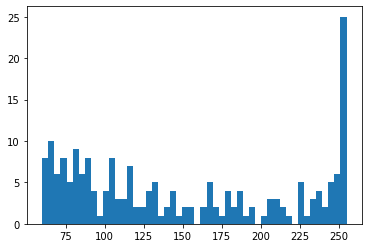

In [ ]:
## survey of brightness of the image
import numpy as np
import matplotlib.pyplot as plt
#csvファイルのダウンロード
import pandas as pd
from PIL import Image
import cv2
import glob

filename="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_1_1_cropped/0300.jpg"

def color_hist(filename):
    img = np.asarray(Image.open(filename).convert("L")).reshape(-1,1)
    plt.hist(img,bins=50,range=(60,255)) #bin:分割数,range:範囲指定
    plt.show()

color_hist(filename)

#Define Spatter

In [ ]:
##writing the image number of spatter to CSV file 

import csv

#max : y coordination of max size of spatter 
max=0

src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/Lateral/220401_ACS1_12-1"

#フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()

#出力ファイル名
filename='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/spatter_12-1.csv'

#ファイルを作成
with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow("Path")

for i,file in enumerate(src_files): #index,components=enumerate(file)
  #print(i)
  # 画像を読み込む。
  img=cv2.imread(file)
  img=np.array(img,dtype=uint8)

  # グレースケールに変換する。
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # 2値化する
  ret, bin_img = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY)

  # 輪郭を抽出する。
  contours, hierarchy = cv2.findContours(np.array(bin_img,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #スパッタの数を数えるパラメータ
  count_spatter=0

  for c in contours:

    #面積(px*px)
    area = cv2.contourArea(c)
    #Areas.append(area)

    #マーカー位置計算
    if area >=600 and area <1100:
      mu=cv2.moments(c)
      x=int(mu["m10"]/mu["m00"])
      y=int(mu["m01"]/mu["m00"])
      #spatter.append([area,y])

      if (y >= 810 and y<860) and (x >= 550 and x <= 750): #レーザによる光の影響を無視するため
        with open(filename,"a",newline='') as f:
          writer = csv.writer(f)
          #writer.writerow(["/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/Lateral/220401_ACS1_12-2/{}.jpg".format(i),1])
          writer.writerow([i])
      

  
#print("frequency from reading to writing =",1/(s/len(src_files))) #周波数 #円形度あり：68.25Hz,円形度なし:81.2Hz
#print(accuracy,len(src_files))

In [ ]:
import pandas as pd
file1=pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/spatter_10-１.csv")
value1=file1.values
print(value1.shape)
print(value1[:10,:])

In [ ]:
## Making dataset if spatter is or not

In [ ]:
##Captrure the number of frames of Lateral video and above video : calculating transformation coefficients(c) from lateral to above

import cv2
#/////////////////change here ////////
movie_lateral= "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/Lateral/220401_ACS1_12-2.avi"
movie_above="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_12-2.avi"
#////////////////////////////////////

cap_lateral = cv2.VideoCapture(movie_lateral)
cap_above = cv2.VideoCapture(movie_above)
# 総フレーム数
num_frame_lateral = cap_lateral.get(cv2.CAP_PROP_FRAME_COUNT)
num_frame_above = cap_above.get(cv2.CAP_PROP_FRAME_COUNT)
#フレーム番号の調整係数:c
c = num_frame_above/num_frame_lateral

print(num_frame_lateral)
print(num_frame_above)
print(c)

In [ ]:
#スパッタ発生時の上部画像番号を取得
import pandas as pd

#///////// Changge here /////////////
file=pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/spatter_1-1.csv")
#/////////////////////////////////////

value=file.values
print(value.shape)
print(value[:5,0]) #横から見た画像のiが表示される
value = value[:,0]
print(value.shape)

#num_spatter : the number of frame with spatter
num_spatter=[]
for i in range(len(value)):
  n = int(c*value[i])
  if n not in num_spatter:
    num_spatter.append(n)
print(len(num_spatter))

#Make dataset

#20220603

In [ ]:
#judged by ML
num_sputter_1_1 = []
num_sputter_1_2 = [206]
num_sputter_2_1 = [418, 800]
num_sputter_2_2 = []
num_sputter_3_1 = []
num_sputter_3_2 = [244]
num_sputter_4_1 = [372]
num_sputter_4_2 = []
num_sputter_5_1 = [149, 232, 551]
num_sputter_5_2 = [707]
num_sputter_6_1 = [691, 766, 1081, 1095, 1100, 1406]
num_sputter_6_2 = [275, 409, 596, 720, 724, 767, 884, 888, 1015, 1624]
num_sputter_7_1 = []
num_sputter_7_2 = []
num_sputter_8_1 = []
num_sputter_8_2 = [99, 685, 689, 825]
num_sputter_9_1 = [486,1297,1531]
num_sputter_9_2 = [300, 310, 331, 334, 367, 370, 375, 482, 611, 616, 620, 627, 632, 928, 945, 1005, 1261]
num_sputter_10_1 = [273, 294, 304]
num_sputter_10_2 = [149]
num_sputter_11_1 = [428, 925, 953, 959]
num_sputter_11_2 = [359,386, 388, 423, 530, 54, 697, 891]
num_sputter_12_1 = [203, 481, 487, 490, 865, 878, 885, 890]
num_sputter_12_2 = [357, 363, 520, 542, 548, 558, 1251, 1670, 1680, 1690, 1695, 1699, 1786, 1789, 1791, 1793]
spatter = [[],[206],[418,800],[],[],[244],[372],[],[149, 232, 551],[707],[691, 766, 1081, 1095, 1100, 1406],
           [275, 409, 596, 720, 724, 767, 884, 888, 1015, 1624],[],[],[],[99, 685, 689, 825],[486,1297,1531],
           [300, 310, 331, 334, 367, 370, 375, 482, 611, 616, 620, 627, 632, 928, 945, 1005, 1261],[273, 294, 304],
           [149],[428, 925, 953, 959],[359,386, 388, 423, 530, 54, 697, 891],[203, 481, 487, 490, 865, 878, 885, 890],
           [357, 363, 520, 542, 548, 558, 1251, 1670, 1680, 1690, 1695, 1699, 1786, 1789, 1791, 1793]]
print(len(spatter))

24


## 20220401 spatter data

In [ ]:
n_spatter_1_1 = [127 ,157 ,198]
n_spatter_1_2 = []


In [ ]:
a = np.asarray([])
print(a)

[]


## 20220401

In [ ]:
import numpy as np

spatter_data_1_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(1,1), delimiter=' ', dtype='int').tolist()
spatter_data_1_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(1,2), delimiter=' ', dtype='int').tolist()
spatter_data_2_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(2,1), delimiter=' ', dtype='int').tolist()
spatter_data_2_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(2,2), delimiter=' ', dtype='int').tolist()
spatter_data_3_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(3,1), delimiter=' ', dtype='int').tolist()
spatter_data_3_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(3,3), delimiter=' ', dtype='int').tolist()
spatter_data_4_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(4,2), delimiter=' ', dtype='int').tolist()
spatter_data_4_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(4,3), delimiter=' ', dtype='int').tolist()
spatter_data_5_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(5,3), delimiter=' ', dtype='int').tolist()
spatter_data_5_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(5,4), delimiter=' ', dtype='int').tolist()
spatter_data_6_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(6,2), delimiter=' ', dtype='int').tolist()
spatter_data_6_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(6,3), delimiter=' ', dtype='int').tolist()
spatter_data_7_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(7,1), delimiter=' ', dtype='int').tolist()
spatter_data_7_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(7,2), delimiter=' ', dtype='int').tolist()
spatter_data_8_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(8,1), delimiter=' ', dtype='int').tolist()
spatter_data_8_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(8,2), delimiter=' ', dtype='int').tolist()
spatter_data_9_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(9,1), delimiter=' ', dtype='int').tolist()
spatter_data_9_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(9,2), delimiter=' ', dtype='int').tolist()
spatter_data_10_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(10,1), delimiter=' ', dtype='int').tolist()
spatter_data_10_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(10,2), delimiter=' ', dtype='int').tolist()
spatter_data_11_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(11,1), delimiter=' ', dtype='int').tolist()
spatter_data_11_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(11,2), delimiter=' ', dtype='int').tolist()
spatter_data_12_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(12,1), delimiter=' ', dtype='int').tolist()
spatter_data_12_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(12,2), delimiter=' ', dtype='int').tolist()

print("spatter12_2 :", type(spatter_data_12_2))

spatter12_2 : <class 'list'>


In [ ]:
spatter = np.zeros(13,2,30)
spatter[]

## Make Time-series dataset

In [ ]:
## make dataset for sequential model
## For making dataset : simple dataset

import csv
import glob

## train data or test data   //////       INput is needed    /////////////

#src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_1_1_cropped"
#src = glob.glob("{}/*.jpg".format(src_img_dir))
#src_files.sort()
#print(len(src_files))
#making file for if there is a large spatters, signal=1, else: signal=0
#//// chagen here ///
filename="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20220603/cropped_image/MLjudge/ts_train_18input_9advance_3.csv"
filename_test="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20220603/cropped_image/MLjudge/ts_test_18input_9advance_3.csv"
#///////////////////

with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)","Path(t-1)","Path(t-2)","Path(t-3)","Path(t-4)","Path(t-5)","Path(t-6)","Path(t-7)","Path(t-8)","Path(t-9)","Path(t-10)","Path(t-11)","Path(t-12)","Path(t-13)","Path(t-14)","Path(t-15)","Path(t-16)","Path(t-17)"])

with open(filename_test,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)","Path(t-1)","Path(t-2)","Path(t-3)","Path(t-4)","Path(t-5)","Path(t-6)","Path(t-7)","Path(t-8)","Path(t-9)","Path(t-10)","Path(t-11)","Path(t-12)","Path(t-13)","Path(t-14)","Path(t-15)","Path(t-16)","Path(t-17)"])


##20220401

In [ ]:
spatter = [[[],[]],
             [spatter_data_1_1,[spatter_data_1_2]],
             [spatter_data_2_1,spatter_data_2_2],
             [spatter_data_3_1,spatter_data_3_2],
             [spatter_data_4_1,spatter_data_4_2],
             [spatter_data_5_1,spatter_data_5_2],
             [spatter_data_6_1,spatter_data_6_2],
             [spatter_data_7_1,spatter_data_7_2],
             [spatter_data_8_1,spatter_data_8_2],
             [spatter_data_9_1,spatter_data_9_2],
             [spatter_data_10_1,spatter_data_10_2],
             [spatter_data_11_1,spatter_data_11_2],
             [spatter_data_12_1,spatter_data_12_2]]
print(len(spatter_data_12_1))
print(len(spatter_data_9_1))

45
27


In [ ]:
import numpy as np

spatter_data_1_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(1,1), delimiter=' ', dtype='int').tolist()
spatter_data_1_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(1,2), delimiter=' ', dtype='int').tolist()
spatter_data_2_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(2,1), delimiter=' ', dtype='int').tolist()
spatter_data_2_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(2,2), delimiter=' ', dtype='int').tolist()
spatter_data_3_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(3,1), delimiter=' ', dtype='int').tolist()
spatter_data_3_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(3,3), delimiter=' ', dtype='int').tolist()
spatter_data_4_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(4,2), delimiter=' ', dtype='int').tolist()
spatter_data_4_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(4,3), delimiter=' ', dtype='int').tolist()
spatter_data_5_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(5,3), delimiter=' ', dtype='int').tolist()
spatter_data_5_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(5,4), delimiter=' ', dtype='int').tolist()
spatter_data_6_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(6,2), delimiter=' ', dtype='int').tolist()
spatter_data_6_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(6,3), delimiter=' ', dtype='int').tolist()
spatter_data_7_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(7,1), delimiter=' ', dtype='int').tolist()
spatter_data_7_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(7,2), delimiter=' ', dtype='int').tolist()
spatter_data_8_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(8,1), delimiter=' ', dtype='int').tolist()
spatter_data_8_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(8,2), delimiter=' ', dtype='int').tolist()
spatter_data_9_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(9,1), delimiter=' ', dtype='int').tolist()
spatter_data_9_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(9,2), delimiter=' ', dtype='int').tolist()
spatter_data_10_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(10,1), delimiter=' ', dtype='int').tolist()
spatter_data_10_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(10,2), delimiter=' ', dtype='int').tolist()
spatter_data_11_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(11,1), delimiter=' ', dtype='int').tolist()
spatter_data_11_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(11,2), delimiter=' ', dtype='int').tolist()
spatter_data_12_1 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(12,1), delimiter=' ', dtype='int').tolist()
spatter_data_12_2 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/220401_xiQ_{}-{}_spatter.txt'.format(12,2), delimiter=' ', dtype='int').tolist()

print("spatter12_2 :", type(spatter_data_12_2))

# adjust the number of no spatter below 51
def make_ts_dataset_0401(filename ,div, sec):
  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  spatter = [[[],[]],
             [spatter_data_1_1,[spatter_data_1_2]],
             [spatter_data_2_1,spatter_data_2_2],
             [spatter_data_3_1,spatter_data_3_2],
             [spatter_data_4_1,spatter_data_4_2],
             [spatter_data_5_1,spatter_data_5_2],
             [spatter_data_6_1,spatter_data_6_2],
             [spatter_data_7_1,spatter_data_7_2],
             [spatter_data_8_1,spatter_data_8_2],
             [spatter_data_9_1,spatter_data_9_2],
             [spatter_data_10_1,spatter_data_10_2],
             [spatter_data_11_1,spatter_data_11_2],
             [spatter_data_12_1,spatter_data_12_2]]
  
  spatter = np.asarray(spatter)
  count = 0
  for i in range(2200):
    if i in spatter[div][sec-1] and (i>36): #スパッタ発生時
      with open(filename,"a",newline='') as f:
        writer = csv.writer(f)
      #///// change here ////////
        writer.writerow([1,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-9),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-10),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-11),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-12),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-13),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-14),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-15),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-16),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-17),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-18),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-19),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-20),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-21),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-22),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-23),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-24),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-25),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-26)])
      #/////////////////////////

    else: #スパッタ発生時ではない
      if 5*i+1>100 :
        if 5*i in spatter[div][sec-1] and (5*i>36):
          continue
        else:
          if count < 60:
            with open(filename,"a",newline='') as f:
              writer = csv.writer(f)
        #////// change here ///////
              writer.writerow([0,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-9),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-10),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-11),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-12),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-13),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-14),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-15),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-16),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-17),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-18),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-19),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-20),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-21),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-22),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-23),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-24),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-25),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-26)])
        #//////////////////////////
            count += 1
          else:
            continue
  return count


spatter12_2 : <class 'list'>


In [ ]:
make_ts_dataset_0401(filename_test,div=12,sec=1)
make_ts_dataset_0401(filename_test,div=9,sec=1)

<ipython-input-6-5da5b7891680>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


60

In [ ]:
for i in range(1,13):
  for j in range(1,3):
    print((i,j))
    if i==1:
      continue
    else:
      if (i== 12 and j==1) or (i== 9 and j==1):
        continue
        #make_ts_dataset_0401(filename_test, div = i,sec = j)
      else:
        make_ts_dataset_0401(filename,div = i,sec = j)


(1, 1)
(1, 2)
(2, 1)


<ipython-input-6-5da5b7891680>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


(2, 2)
(3, 1)
(3, 2)
(4, 1)
(4, 2)
(5, 1)
(5, 2)
(6, 1)
(6, 2)
(7, 1)
(7, 2)
(8, 1)
(8, 2)
(9, 1)
(9, 2)
(10, 1)
(10, 2)
(11, 1)
(11, 2)
(12, 1)
(12, 2)


In [ ]:
import pandas as pd
file = pd.read_csv(filepath_or_buffer = filename)
value =file.values
count = 0
for i in range(len(value)):
  if value[i,0] == 1:
    count += 1
print(count)
print(len(value))

1736
9817


## 20220603

In [ ]:
def make_ts_dataset_0603(filename ,div, sec):
  spatter = [[[],[]],
             [[],[206]],
             [[418,800],[]],
             [[],[244]],
             [[372],[]],
             [[149, 232, 551],[707]],
             [[691, 766, 1081, 1095, 1100, 1406],[275, 409, 596, 720, 724, 767, 884, 888, 1015, 1624]],
             [[],[]],
             [[],[99, 685, 689, 825]],
             [[486,1297,1531],[300, 310, 331, 334, 367, 370, 375, 482, 611, 616, 620, 627, 632, 928, 945, 1005, 1261]],
             [[273, 294, 304],[149]],
             [[428, 925, 953, 959],[359,386, 388, 423, 530, 54, 697, 891]],
             [[203, 481, 487, 490, 865, 878, 885, 890],[357, 363, 520, 542, 548, 558, 1251, 1670, 1680, 1690, 1695, 1699, 1786, 1789, 1791, 1793]]
           ]
  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  spatter = np.asarray(spatter)
  count = 0
  for i in range(2200):
    if i in spatter[div][sec-1] and (i>36): #スパッタ発生時
      with open(filename,"a",newline='') as f:
        writer = csv.writer(f)
      #///// change here ////////
        writer.writerow([1,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-9),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-10),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-11),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-12),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-13),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-14),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-15),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-16),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-17),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-18),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-19),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-20),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-21),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-22),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-23),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-24),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-25),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,i-26)])

              #)      #/////////////////////////

    else: #スパッタ発生時ではない
      if 5*i+1>100 :
        if 5*i in spatter[div][sec-1] and (5*i>36):
          continue
        else:
          if count < 60:
            with open(filename,"a",newline='') as f:
              writer = csv.writer(f)
        #////// change here ///////
              writer.writerow([0,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-9),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-10),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-11),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-12),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-13),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-14),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-15),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-16),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-17),
                     "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-18),
                     "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-19),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-20),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-21),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-22),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-23),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-24),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-25),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_{}_{}_cropped/{:0>4}.jpg".format(div,sec,5*i-26)])
        #//////////////////////////
          count += 1
      else:
        continue
  return count


In [ ]:
make_ts_dataset_0603(filename_test,div=12,sec=1)
make_ts_dataset_0603(filename_test,div=9,sec=1)

<ipython-input-14-bd05c5c91096>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


2177

In [ ]:
for i in range(1,13):
  for j in range(1,3):
    print((i,j))
    if (i== 12 and j==1) or (i== 9 and j==1):
      continue
      #make_ts_dataset_0603(filename_test, div = i,sec = j)
    else:
      make_ts_dataset_0603(filename,div = i,sec = j)


(1, 1)


<ipython-input-14-bd05c5c91096>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


(1, 2)
(2, 1)
(2, 2)
(3, 1)
(3, 2)
(4, 1)
(4, 2)
(5, 1)
(5, 2)
(6, 1)
(6, 2)
(7, 1)
(7, 2)
(8, 1)
(8, 2)
(9, 1)
(9, 2)
(10, 1)
(10, 2)
(11, 1)
(11, 2)
(12, 1)
(12, 2)


#20221020

In [ ]:
import numpy as np

spatter_data_21 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(21), delimiter=' ', dtype='int').tolist()
spatter_data_22 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(22), delimiter=' ', dtype='int').tolist()
spatter_data_23 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(23), delimiter=' ', dtype='int').tolist()
spatter_data_24 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(24), delimiter=' ', dtype='int').tolist()
spatter_data_25 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(25), delimiter=' ', dtype='int').tolist()
spatter_data_26 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(26), delimiter=' ', dtype='int').tolist()
spatter_data_27 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(27), delimiter=' ', dtype='int').tolist()
spatter_data_28 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(28), delimiter=' ', dtype='int').tolist()
spatter_data_29 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(29), delimiter=' ', dtype='int').tolist()
spatter_data_30 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(30), delimiter=' ', dtype='int').tolist()
spatter_data_31 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(31), delimiter=' ', dtype='int').tolist()
spatter_data_32 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(32), delimiter=' ', dtype='int').tolist()
spatter_data_33 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(33), delimiter=' ', dtype='int').tolist()
spatter_data_34 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(34), delimiter=' ', dtype='int').tolist()
spatter_data_35 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(35), delimiter=' ', dtype='int').tolist()
spatter_data_36 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(36), delimiter=' ', dtype='int').tolist()
spatter_data_37 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(37), delimiter=' ', dtype='int').tolist()
spatter_data_38 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(38), delimiter=' ', dtype='int').tolist()
spatter_data_39 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(39), delimiter=' ', dtype='int').tolist()
spatter_data_40 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(40), delimiter=' ', dtype='int').tolist()
spatter_data_41 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(41), delimiter=' ', dtype='int').tolist()
spatter_data_42 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(42), delimiter=' ', dtype='int').tolist()
spatter_data_43 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(43), delimiter=' ', dtype='int').tolist()
spatter_data_44 = np.loadtxt('/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim_spatter.txt'.format(44), delimiter=' ', dtype='int').tolist()


In [ ]:
spatter = [[[],[]],
             [spatter_data_21,[spatter_data_33]],
             [spatter_data_22,spatter_data_34],
             [spatter_data_23,spatter_data_35],
             [spatter_data_24,spatter_data_36],
             [spatter_data_25,spatter_data_37],
             [spatter_data_26,spatter_data_38],
             [spatter_data_27,spatter_data_39],
             [spatter_data_28,spatter_data_40],
             [spatter_data_29,spatter_data_41],
             [spatter_data_30,spatter_data_42],
             [spatter_data_31,spatter_data_43],
             [spatter_data_32,spatter_data_44]]
print(spatter)

In [ ]:
import os
for i in range(21,45):
  dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed'.format(i)
  print(sum(os.path.isfile(os.path.join(dir,name)) for name in os.listdir(dir)))


244
448
895
245
448
863
235
430
857
233
312
880
236
434
866
240
440
883
240
442
889
242
447
892


In [ ]:
import csv
import glob
import os

## train data or test data   //////       INput is needed    /////////////

#src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_1_1_cropped"
#src = glob.glob("{}/*.jpg".format(src_img_dir))
#src_files.sort()
#print(len(src_files))
#making file for if there is a large spatters, signal=1, else: signal=0

save_dir = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020"
if not os.path.exists(save_dir):
  os.mkdir(save_dir)

#//// chagen here ///
filename="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/train_10input_full.csv"
filename_test="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/test_10inputs_full.csv"
#///////////////////

with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)","Path(t-1)","Path(t-2)","Path(t-3)","Path(t-4)","Path(t-5)","Path(t-6)","Path(t-7)","Path(t-8)","Path(t-9)"])#,"Path(t-9)","Path(t-10)","Path(t-11)","Path(t-12)","Path(t-13)","Path(t-14)","Path(t-15)","Path(t-16)","Path(t-17)"])

with open(filename_test,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)","Path(t-1)","Path(t-2)","Path(t-3)","Path(t-4)","Path(t-5)","Path(t-6)","Path(t-7)","Path(t-8)","Path(t-9)"])#,"Path(t-9)","Path(t-10)","Path(t-11)","Path(t-12)","Path(t-13)","Path(t-14)","Path(t-15)","Path(t-16)","Path(t-17)"])

In [ ]:
import os
import numpy as np
def make_ts_dataset_1020(filename ,div):
  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  spatter = [[],
             [54],
             [],
             [1, 26, 47, 64, 120, 209, 254, 306, 329, 332],
             [],
             [7, 51, 126, 140, 583, 588, 645, 649, 712, 716, 787],
             [],[17, 193],
             [],[49, 54, 69, 71, 197, 251, 261, 277, 290, 306],
             [61, 75, 124, 166, 168, 176, 247, 393, 451, 468, 529, 599, 668, 700],[52, 108, 115 ,186, 189, 191, 224, 229, 233, 247, 249, 269, 353, 418, 424, 473, 499, 514, 559, 562, 573, 582, 587, 616, 661, 724],
             [19 ,31 ,88 ,112 ],[6],
             [30 ,39 ,69 ,89 ,116, 137 ,149 ,338, 356 ],[59, 84 ,88 ,97 ,110 ,113 ,119 ,124 ,136 ,171 ,214 ,221 ,226 ,246 ,250 ,257 ,280 ,282 ,365 ,368 ,379 ,385],
             [3, 6 ,21 ,45 ,55 ,80, 92, 97 ,114, 122 ,159, 167, 183 ,218, 222, 266, 289, 333, 342 ,361, 400, 439 ,446 ,501 ,524 ,530 ,546 ,566 ,594 ,598 ,627 ,679],[7, 12 ,22 ,24 ,42 ,58 ,61 ,63 ,67 ,71 ,78, 82 ,86 ,127, 145 ,147, 150, 154 ,207 ,212, 221, 226 ,248 ,252 ,257 ,282 ,285 ,302 ,321 ,334 ,336 ,341 ,365 ,385 ,393, 481 ,491 ,494 ,511 ,520 ,563 ,577 ,587 ,594 ,616 ,624 ,630 ,635 ,637 ,641 ,677 ,684 ,699 ,703 ,717 ,726 ,766 ,772],
             [76, 165, 180],[3, 90, 127, 141],
             [27, 42, 77, 99, 113, 129, 133, 137, 141, 151, 154, 160 ,191, 194, 206 ,209 ,235 ,264, 282, 292, 309, 312, 316, 323 ,338 ,370 ,377],[11, 22 ,27 ,29, 32, 59, 90, 94, 97, 108, 112, 120, 123, 127 ,147 ,153, 155, 176, 180 ,185, 216 ,222 ,227 ,232 ,245 ,254 ,305 ,307, 314 ,317 ,340, 404],
             [1, 5 ,13 ,32 ,51 ,59, 72, 101 ,123, 137 ,151 ,162 ,185 ,242 ,264 ,275 ,284 ,286 ,313 ,320 ,362 ,369, 382 ,389 ,426, 460, 505, 529, 540, 554, 603 ,619 ,636 ,664, 695, 705, 714 ,731 ,739, 763 ,772 ,777 ],[20, 48 ,51 ,57 ,62 ,64 ,72 ,78, 80, 90, 93, 137, 150, 163, 172, 182, 194 ,204 ,232, 238 ,243 ,259 ,269 ,281 ,286, 297, 307 ,330 ,339 ,358, 365, 367, 372 ,384 ,398 ,402 ,421 ,429 ,438, 441, 448 ,468 ,475 ,477, 492 ,500 ,506 ,509 ,523, 535, 550 ,562, 594 ,638 ,673 ,675 ,702 ,724 ,727]
           ]
           
  #フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
  spatter = np.asarray(spatter)
  count = 0

  #get num of file in a directory
  dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed_2'.format(div)
  num_photo = sum(os.path.isfile(os.path.join(dir,name)) for name in os.listdir(dir))
  print("{} progressing".format(div))
  for i in range(2,num_photo+2-18):
    #print("{}:::progress:{:.1f}%".format(div,i/num_photo*100))
    if (((i+18) in spatter[div-21]) or((i+17) in spatter[div-21]) or ((i+16) in spatter[div-21]) or ((i+15) in spatter[div-21]) or ((i+14) in spatter[div-21]) or 
        ((i+13) in spatter[div-21]) or ((i+12) in spatter[div-21]) or ((i+11) in spatter[div-21]) or ((i+10) in spatter[div-21])): #スパッタ発生時
      with open(filename,"a",newline='') as f:
        writer = csv.writer(f)
      #///// change here ////////
      #for 64*64 images
        
        writer.writerow([1,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+8),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+7),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+6),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+5),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+4),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+3),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+2),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+1),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i),
                        "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i-1)])#,
        '''/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-27),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-28),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-29),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-30),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-31),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-32),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-33),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-34),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-35)])
        '''
       
      #/////////////////////////
      #for 32*32 images
        """
        writer.writerow([1,
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-9),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-10),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-11),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-12),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-13),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-14),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-15),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-16),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-17),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-18),
                       "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-19),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-20),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-21),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-22),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-23),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-24),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-25),
                      "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,i-26)])
      #/////////////////////////
      """
    else: #スパッタ発生時ではない
    
      #for exclude extra data
      #if i in spatter[div] and (i>36):
      #  continue
      #else:
      #if count < 60  :
      with open(filename,"a",newline='') as f:
        writer = csv.writer(f)
#////// change here ///////
    #for 64*64 images
        
        writer.writerow([0,
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+8),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+7),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+6),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+5),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+4),
                "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+3),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+2),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i+1),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i),
                   "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/{:0>4}.jpg".format(div,i-1)])#,
        '''"/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-27),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-28),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-29),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-30),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-31),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-32),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-33),
                "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-34),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_{}_trim/processed/{:0>4}.jpg".format(div,i-35)])
        '''
          
  #/////////////////////////
        #for 32*32 images
        """
          writer.writerow([0,
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-9),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-10),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-11),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-12),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-13),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-14),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-15),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-16),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-17),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-18),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-19),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-20),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-21),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-22),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-23),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-24),
                  "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-25),
                    "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}_cropped/{:0>4}.jpg".format(div,3*i-26)])
    #/////////////////////////
          
          count += 1
      else:
          continue
        """ 
        #return count


In [ ]:
for i in range(33,45):
    if (i== 37):#test data
      make_ts_dataset_1020(filename_test,div = i)
      #make_ts_dataset_0603(filename_test, div = i,sec = j)
    else:
      make_ts_dataset_1020(filename,div = i)

In [ ]:
for i in range(21,45):
    if (i== 23) or (i==39) or (i== 43):#test data
      #continue
      make_ts_dataset_1020(filename_test, div = i)
    elif i==42:
      continue
    else:
      make_ts_dataset_1020(filename,div = i)

<ipython-input-12-f64bfb72da9a>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


21 progressing
22 progressing
23 progressing
24 progressing
25 progressing
26 progressing
27 progressing
28 progressing
29 progressing
30 progressing
31 progressing
32 progressing
33 progressing
34 progressing
35 progressing
36 progressing
37 progressing
38 progressing
39 progressing
40 progressing
41 progressing
43 progressing
44 progressing


In [ ]:
make_ts_dataset_1020(filename_test,div=23)
make_ts_dataset_1020(filename_test,div=39)
make_ts_dataset_1020(filename_test,div=43)

<ipython-input-5-3559ee8f395e>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spatter = np.asarray(spatter)


23 progressing
39 progressing
43 progressing


#Check dataset

In [ ]:
import pandas as pd
file = pd.read_csv(filepath_or_buffer = filename_test)
value =file.values
#print(value[:10])
count = 0

for i in range(len(value)):
  if value[i,0] == 1:
    count += 1
print(count)
print(len(value))

213
1528


#Plot spatter

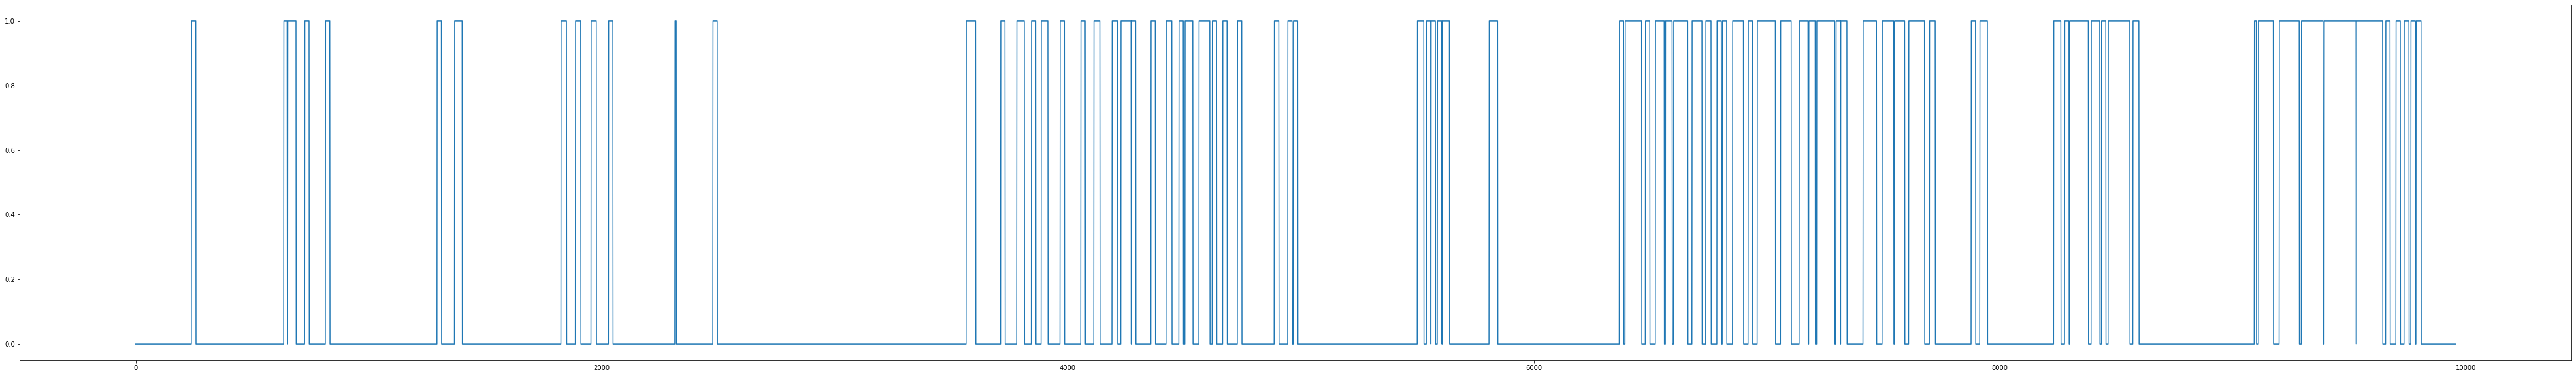

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,10))
plt.plot(value[:,0])

In [ ]:
## make dataset for single classification
## For making dataset : simple dataset

import csv
import glob

## train data or test data   //////       INput is needed    /////////////

#src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_1_1_cropped"
#src = glob.glob("{}/*.jpg".format(src_img_dir))
#src_files.sort()
#print(len(src_files))
#making file for if there is a large spatters, signal=1, else: signal=0
#//// chagen here ///
filename="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20220603/cropped_image/MLjudge/classification_train.csv"
filename_test="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20220603/cropped_image/MLjudge/classification_test.csv"
#///////////////////

with open(filename,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)"])

with open(filename_test,"w") as f:
  writer = csv.writer(f)
  writer.writerow(["Spatter","Path(t)"])
